In [51]:
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegressionCV
import numpy as np
import scipy as sp
from scipy.ndimage import filters
import os
os.sys.path.append('../')

import utilities as u
import preprocessing as pp
from functools import reduce
import pickle
import matplotlib.gridspec as gridspec

%load_ext autoreload
%autoreload 2

%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [3]:
df = pp.load_session_db()
df = df[df['RewardCount']>30]
df = df[df['Imaging']==1]
df = df.sort_values(['MouseName','DateTime','SessionNumber'])
tracks = 'TwoTower_noTimeout|TwoTower_Timeout|Reversal_noTimeout|Reversal|TwoTower_foraging|FreqMorph_Decision|FreqMorph_Timeout'
df = df[df['Track'].str.contains(tracks,regex=True)]

G:\My Drive\VR_Data\TwoTower\behavior.sqlite
G:\My Drive\VR_Data\TwoTower\4222174.0\30_05_2019\RuningTraining_1.sqlite
file doesn't exist, errors to come!!!


In [121]:
mouse = '4139224.3'
df_mouse = df[df['MouseName'].str.match(mouse)]
df_mouse

,MouseName,DateFolder,SessionNumber,Track,RewardCount,Imaging,ImagingRegion,DateTime,data file,scanfile,scanmat,s2pfolder
805,4139224.3,18_10_2018,1,TwoTower_noTimeout,61,1,CA1,2018-10-18,G:\My Drive\VR_Data\TwoTower\4139224.3\18_10_2...,G:\My Drive\2P_Data\TwoTower\4139224.3\18_10_2...,G:\My Drive\2P_Data\TwoTower\4139224.3\18_10_2...,G:\My Drive\2P_Data\TwoTower\4139224.3\18_10_2...
807,4139224.3,18_10_2018,3,TwoTower_noTimeout,41,1,CA1,2018-10-18,G:\My Drive\VR_Data\TwoTower\4139224.3\18_10_2...,G:\My Drive\2P_Data\TwoTower\4139224.3\18_10_2...,G:\My Drive\2P_Data\TwoTower\4139224.3\18_10_2...,G:\My Drive\2P_Data\TwoTower\4139224.3\18_10_2...
841,4139224.3,20_10_2018,2,TwoTower_noTimeout,60,1,CA1,2018-10-20,G:\My Drive\VR_Data\TwoTower\4139224.3\20_10_2...,G:\My Drive\2P_Data\TwoTower\4139224.3\20_10_2...,G:\My Drive\2P_Data\TwoTower\4139224.3\20_10_2...,G:\My Drive\2P_Data\TwoTower\4139224.3\20_10_2...
879,4139224.3,23_10_2018,1,TwoTower_Timeout,48,1,CA1,2018-10-23,G:\My Drive\VR_Data\TwoTower\4139224.3\23_10_2...,G:\My Drive\2P_Data\TwoTower\4139224.3\23_10_2...,G:\My Drive\2P_Data\TwoTower\4139224.3\23_10_2...,G:\My Drive\2P_Data\TwoTower\4139224.3\23_10_2...
909,4139224.3,25_10_2018,1,TwoTower_Timeout,69,1,,2018-10-25,G:\My Drive\VR_Data\TwoTower\4139224.3\25_10_2...,G:\My Drive\2P_Data\TwoTower\4139224.3\25_10_2...,G:\My Drive\2P_Data\TwoTower\4139224.3\25_10_2...,G:\My Drive\2P_Data\TwoTower\4139224.3\25_10_2...
933,4139224.3,26_10_2018,3,TwoTower_Timeout,72,1,CA1,2018-10-26,G:\My Drive\VR_Data\TwoTower\4139224.3\26_10_2...,G:\My Drive\2P_Data\TwoTower\4139224.3\26_10_2...,G:\My Drive\2P_Data\TwoTower\4139224.3\26_10_2...,G:\My Drive\2P_Data\TwoTower\4139224.3\26_10_2...
949,4139224.3,27_10_2018,4,TwoTower_Timeout,67,1,CA1,2018-10-27,G:\My Drive\VR_Data\TwoTower\4139224.3\27_10_2...,G:\My Drive\2P_Data\TwoTower\4139224.3\27_10_2...,G:\My Drive\2P_Data\TwoTower\4139224.3\27_10_2...,G:\My Drive\2P_Data\TwoTower\4139224.3\27_10_2...
959,4139224.3,29_10_2018,1,TwoTower_Timeout,71,1,CA1,2018-10-29,G:\My Drive\VR_Data\TwoTower\4139224.3\29_10_2...,G:\My Drive\2P_Data\TwoTower\4139224.3\29_10_2...,G:\My Drive\2P_Data\TwoTower\4139224.3\29_10_2...,G:\My Drive\2P_Data\TwoTower\4139224.3\29_10_2...
970,4139224.3,30_10_2018,1,TwoTower_Timeout,78,1,CA1,2018-10-30,G:\My Drive\VR_Data\TwoTower\4139224.3\30_10_2...,G:\My Drive\2P_Data\TwoTower\4139224.3\30_10_2...,G:\My Drive\2P_Data\TwoTower\4139224.3\30_10_2...,G:\My Drive\2P_Data\TwoTower\4139224.3\30_10_2...
983,4139224.3,31_10_2018,2,TwoTower_Timeout,66,1,CA1,2018-10-31,G:\My Drive\VR_Data\TwoTower\4139224.3\31_10_2...,G:\My Drive\2P_Data\TwoTower\4139224.3\31_10_2...,G:\My Drive\2P_Data\TwoTower\4139224.3\31_10_2...,G:\My Drive\2P_Data\TwoTower\4139224.3\31_10_2...


In [122]:
sess = df_mouse.iloc[5]

In [123]:
VRDat,C, S, A = pp.load_scan_sess(sess)
C/=1546

num aberrant ttls 0.0
31376 (31376,) (31376, 20) 99274


C:\Users\mplitt\Anaconda3\lib\site-packages\pandas\core\frame.py:4034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


frame diff 0


In [124]:
pos_mask = VRDat.pos._values>=0
bin_edges= np.arange(0,451,20)
bin_edges[-1]=455
nbins = bin_edges.shape[0]-1
    
train_mask = pos_mask & ((VRDat.morph==1) | (VRDat.morph==0.))


In [125]:
trial_info, tstart_inds, teleport_inds = u.by_trial_info(VRDat)
effmorph =trial_info['morphs']+trial_info['bckgndJitter']+trial_info['wallJitter']+trial_info['towerJitter']
effmorph = (effmorph+.25)/1.5

C:\Users\mplitt\MightyMorphingPhotonRangers\utilities.py:324: RuntimeWarning: Mean of empty slice
  zone1_speed[i] = np.nanmean(sub_frame.loc[zone1_mask,'speed'])


In [126]:
K = sp.stats.zscore(C,axis=1)

In [116]:


svc = SVC(probability=True)
svc.fit(K[train_mask,:],np.digitize(VRDat.pos._values[train_mask],bin_edges)+(bin_edges.shape[0]-1)*VRDat.morph._values[train_mask])

X = np.digitize(VRDat.pos._values,bin_edges)+nbins*VRDat.morph._values*pos_mask



In [117]:
L = svc.predict_proba(K)

In [118]:
print(L.shape)

(34737, 44)


(34737,)


C:\Users\mplitt\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


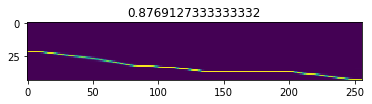

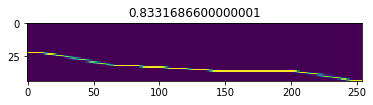

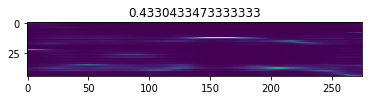

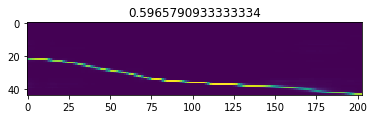

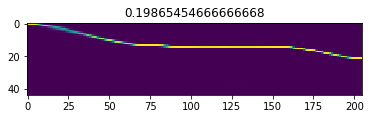

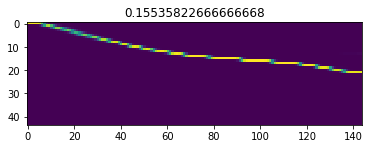

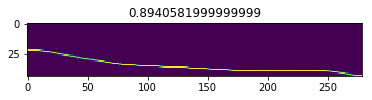

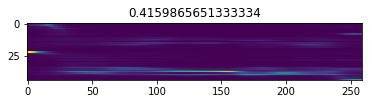

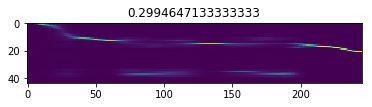

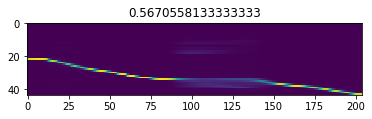

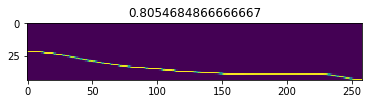

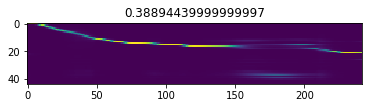

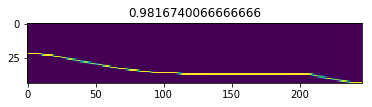

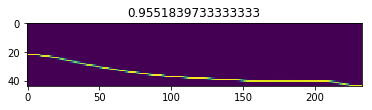

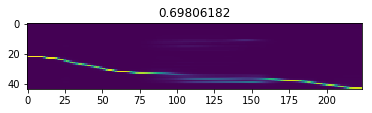

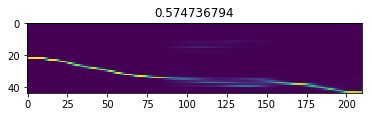

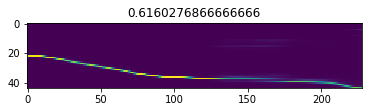

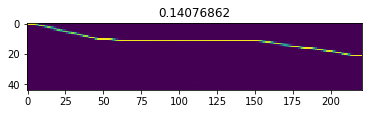

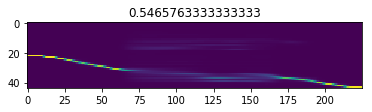

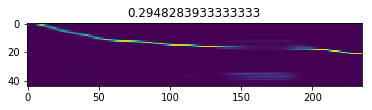

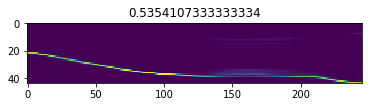

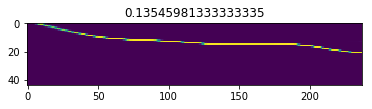

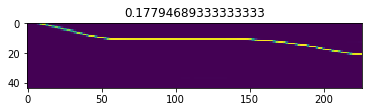

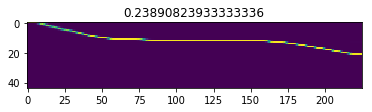

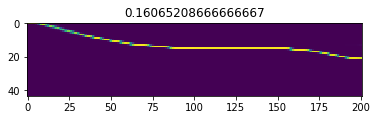

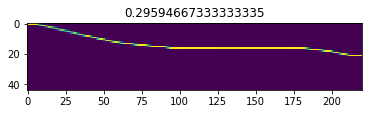

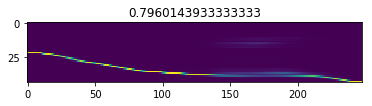

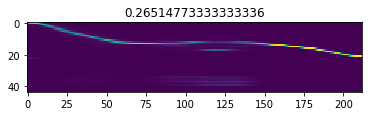

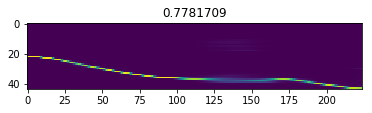

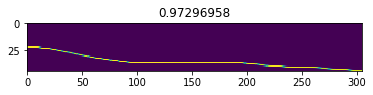

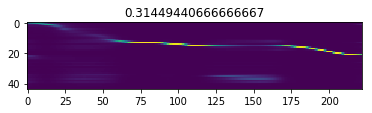

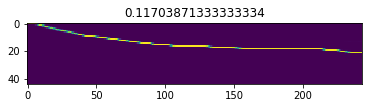

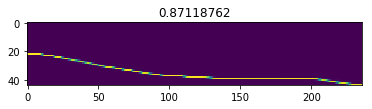

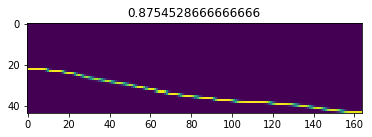

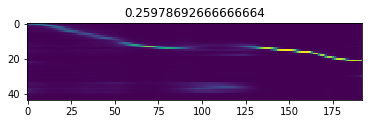

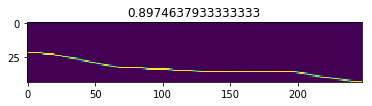

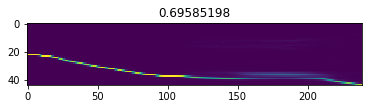

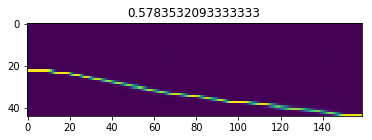

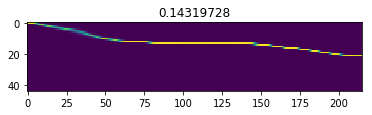

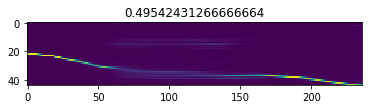

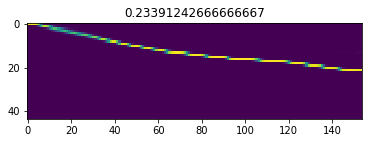

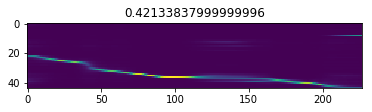

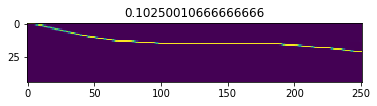

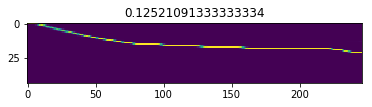

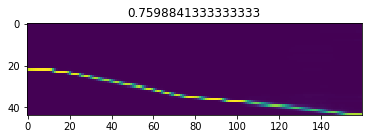

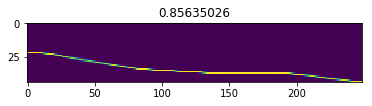

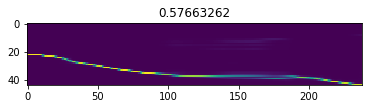

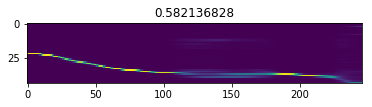

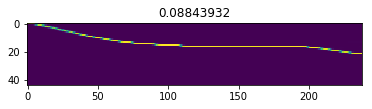

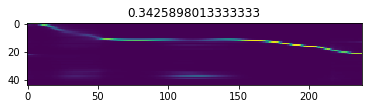

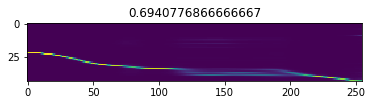

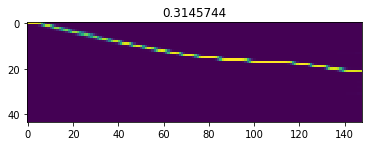

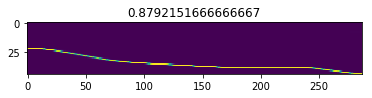

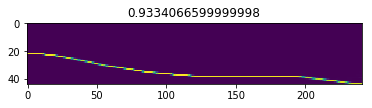

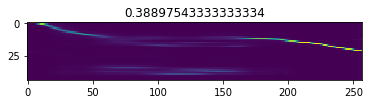

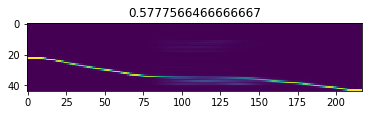

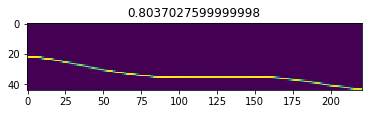

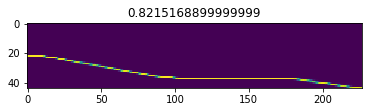

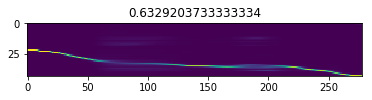

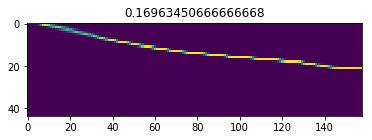

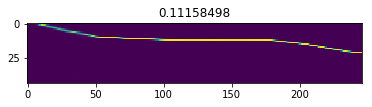

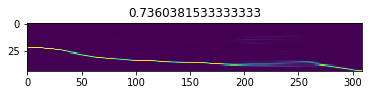

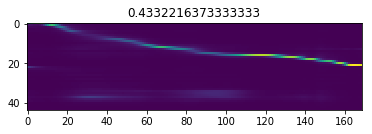

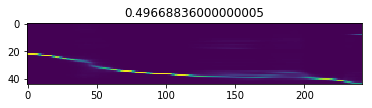

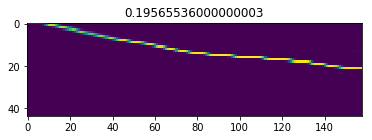

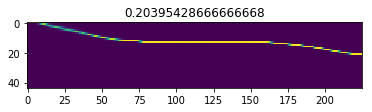

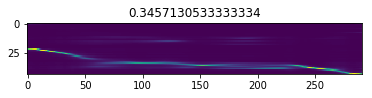

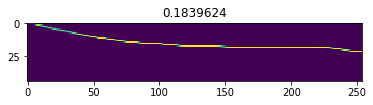

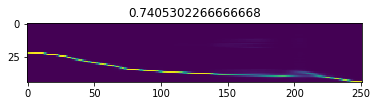

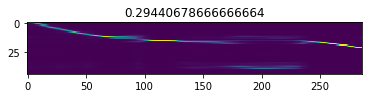

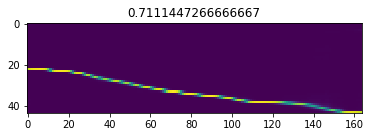

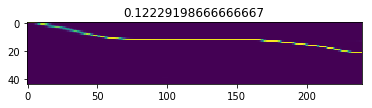

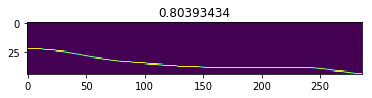

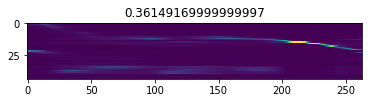

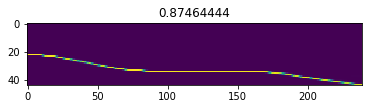

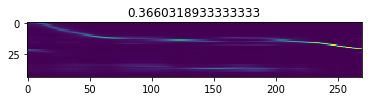

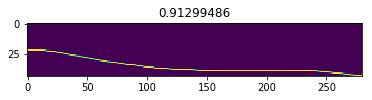

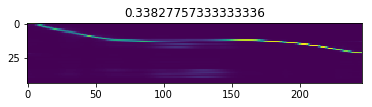

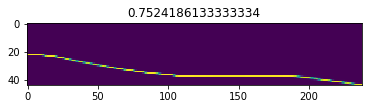

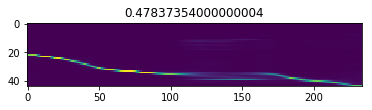

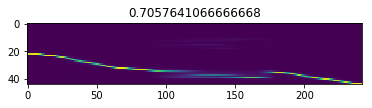

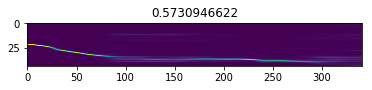

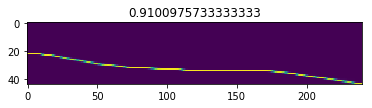

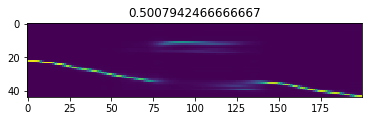

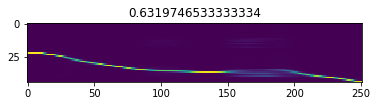

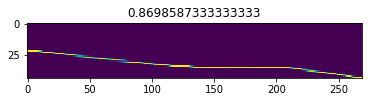

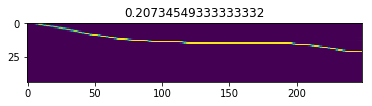

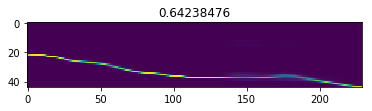

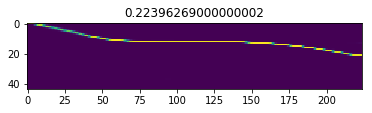

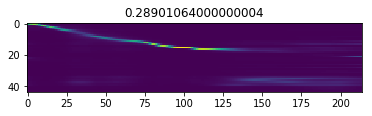

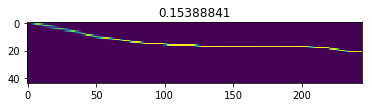

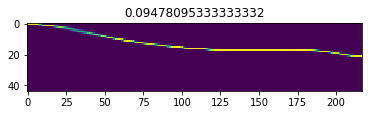

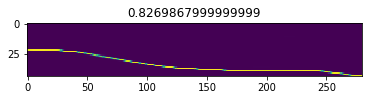

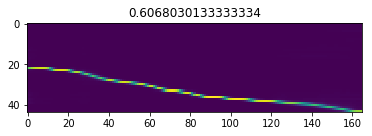

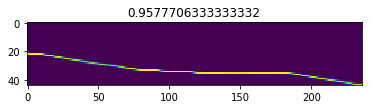

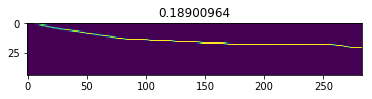

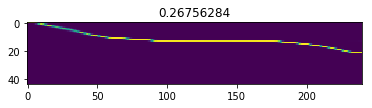

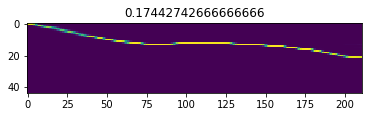

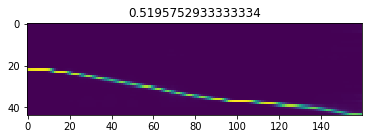

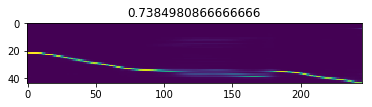

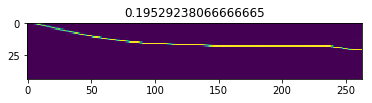

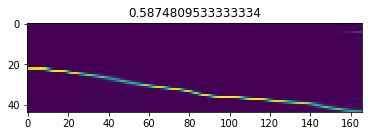

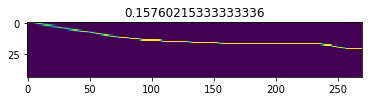

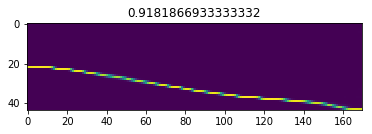

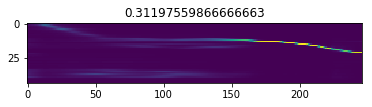

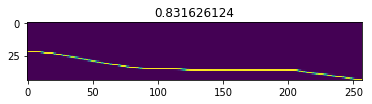

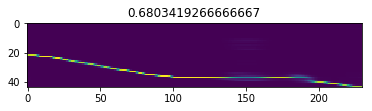

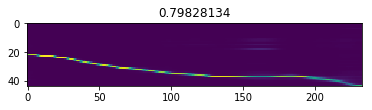

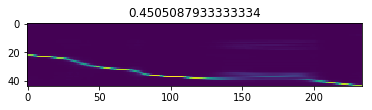

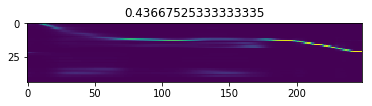

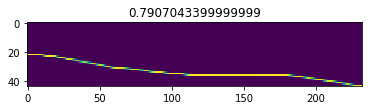

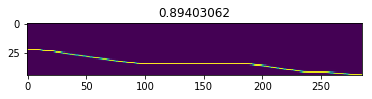

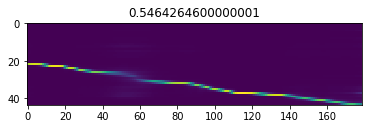

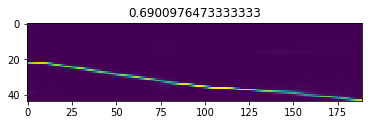

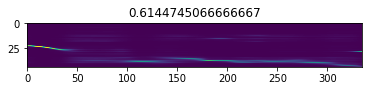

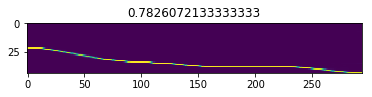

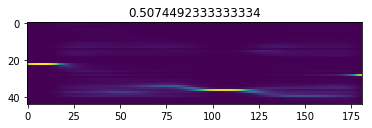

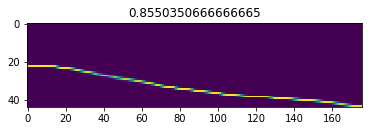

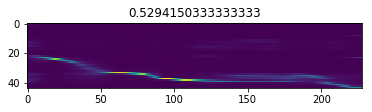

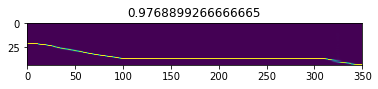

In [119]:
llr = np.zeros([L.shape[0],])
llr_trial = np.zeros([tstart_inds.shape[0],])
print(llr.shape)
for i,(start,stop) in enumerate(zip(tstart_inds.tolist(),teleport_inds.tolist())):
    f,ax = plt.subplots()
    ax.imshow(L[start:stop,:].T)
    ax.set_title(effmorph[i])
    
    tmp=np.log(L[start:stop,:22].sum(axis=1)) - np.log(L[start:stop,22:].sum(axis=1))
    
    llr[start:stop]=tmp
    llr_trial[i]=tmp.mean()

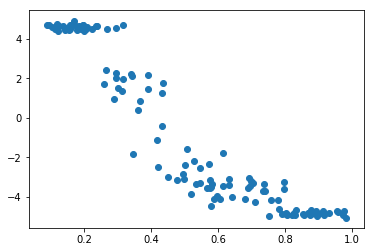

In [120]:
f,ax = plt.subplots()
ax.scatter(effmorph,llr_trial)

In [127]:
logreg = LogisticRegressionCV(Cs=5,penalty='l2',multi_class='multinomial',class_weight="balanced")
# Csm = sp.ndimage.filters.gaussian_filter1d(C,3,axis=0)
# K = C/np.linalg.norm(C,2,axis=1)[:,np.newaxis]
K = sp.stats.zscore(C,axis=1)
logreg.fit(K[train_mask,:],np.digitize(VRDat.pos._values[train_mask],bin_edges)+(bin_edges.shape[0]-1)*VRDat.morph._values[train_mask])
LogL = logreg.predict_proba(K)

C:\Users\mplitt\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
C:\Users\mplitt\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\mplitt\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\mplitt\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\Users\mplitt\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs faile

C:\Users\mplitt\Anaconda3\lib\site-packages\matplotlib\pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


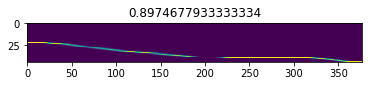

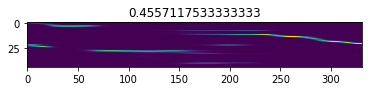

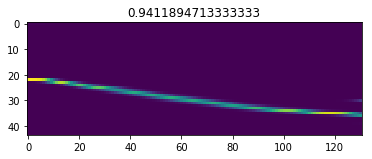

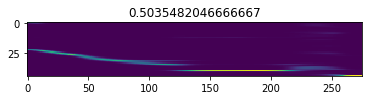

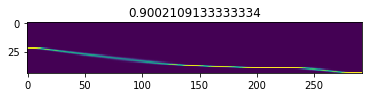

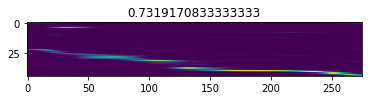

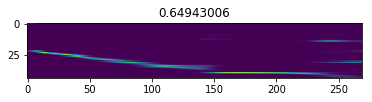

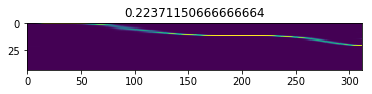

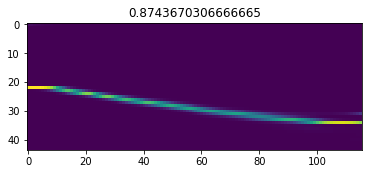

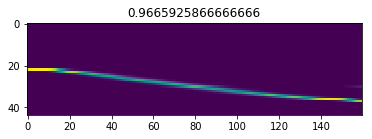

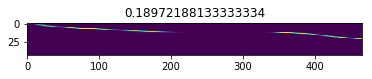

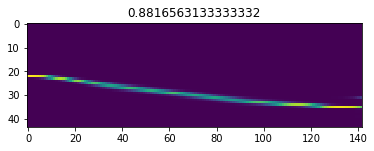

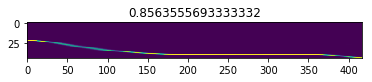

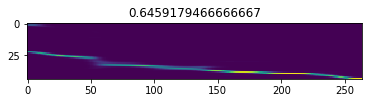

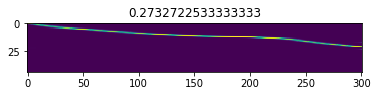

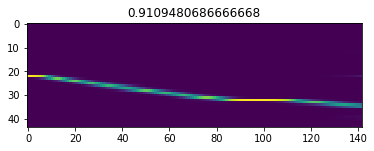

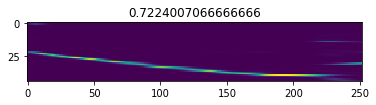

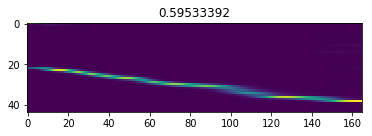

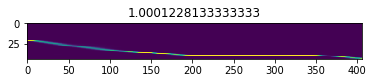

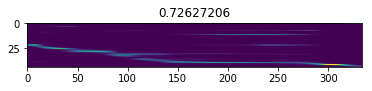

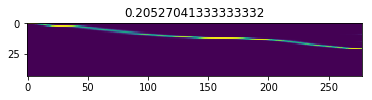

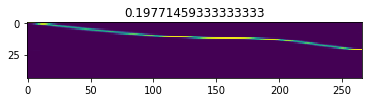

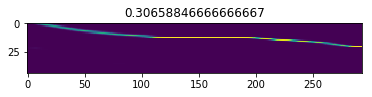

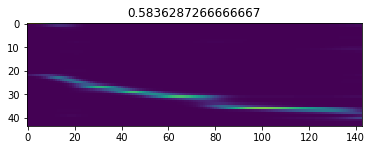

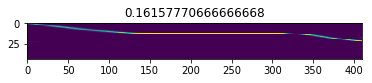

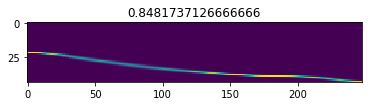

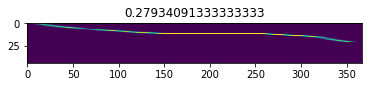

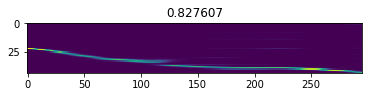

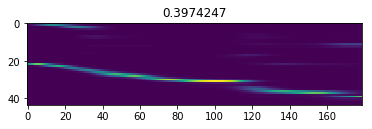

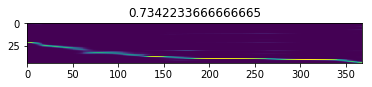

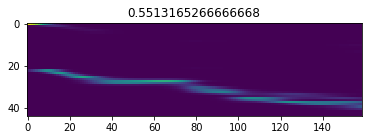

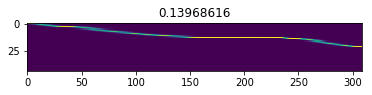

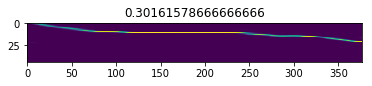

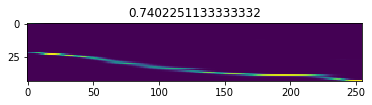

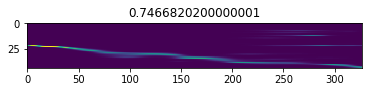

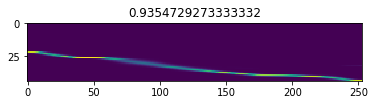

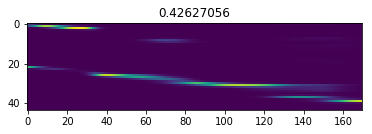

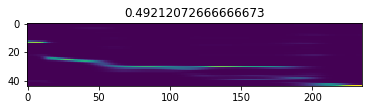

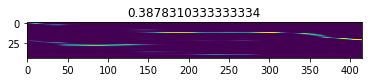

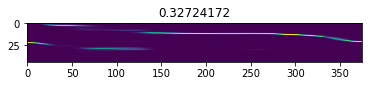

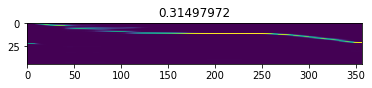

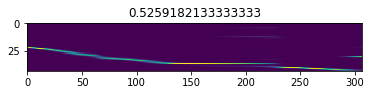

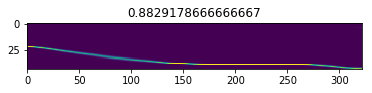

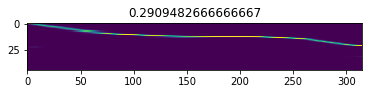

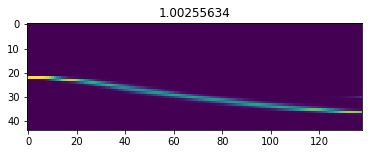

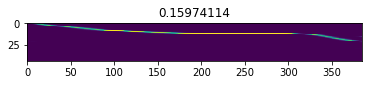

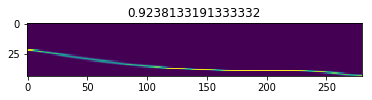

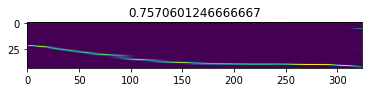

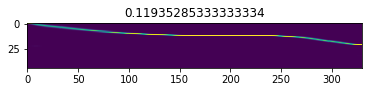

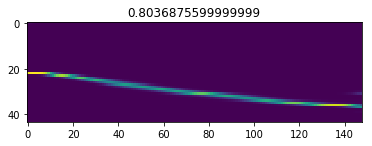

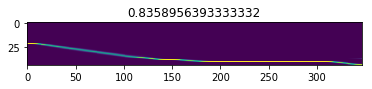

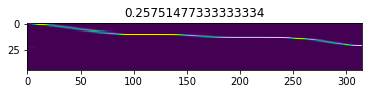

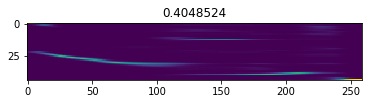

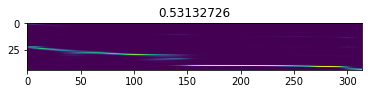

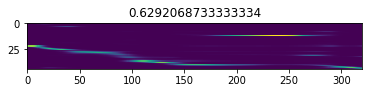

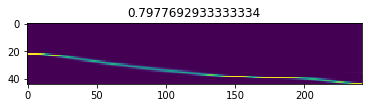

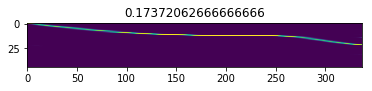

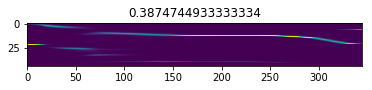

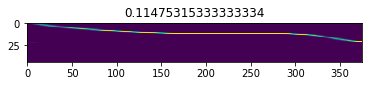

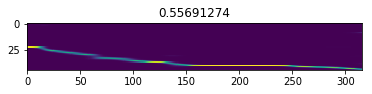

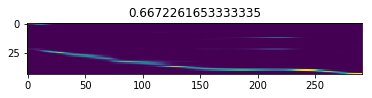

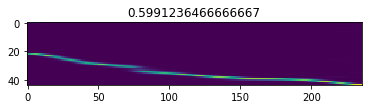

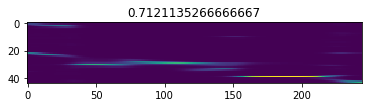

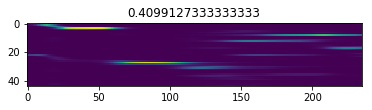

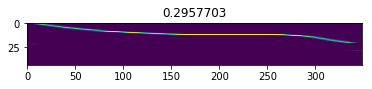

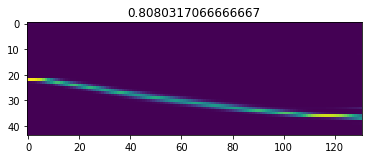

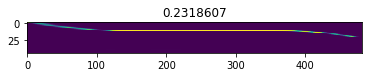

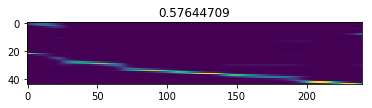

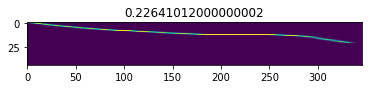

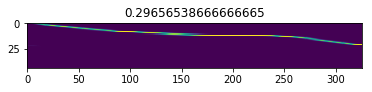

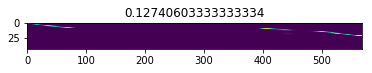

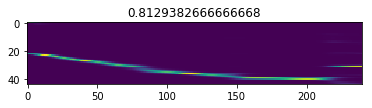

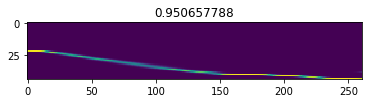

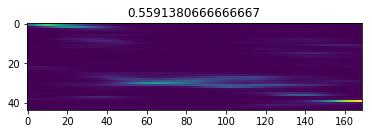

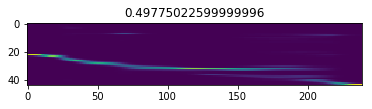

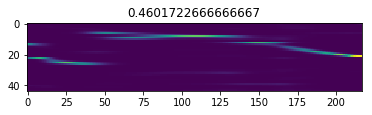

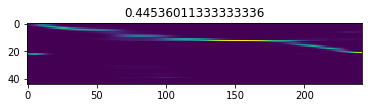

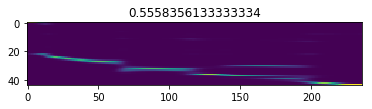

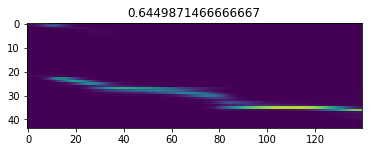

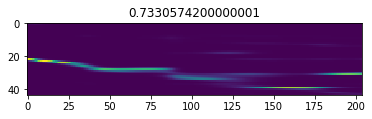

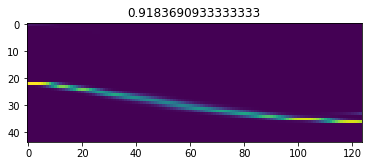

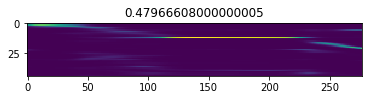

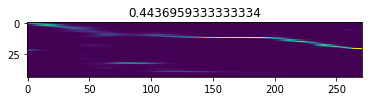

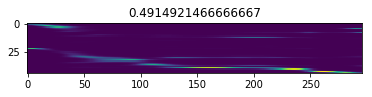

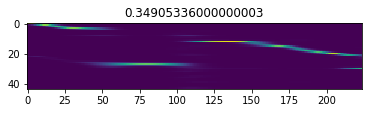

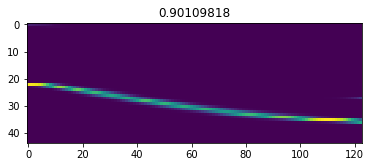

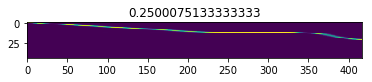

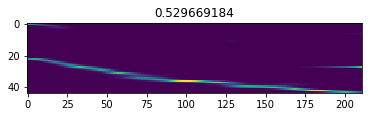

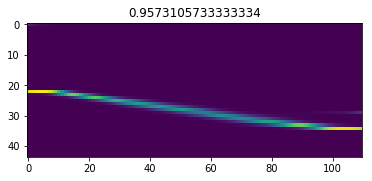

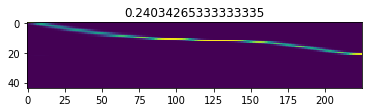

In [128]:
loglr = np.zeros([LogL.shape[0],])
loglr_trial = np.zeros([tstart_inds.shape[0],])

for i,(start,stop) in enumerate(zip(tstart_inds.tolist(),teleport_inds.tolist())):
    f,ax = plt.subplots()
    ax.imshow(LogL[start:stop,:].T)
    ax.set_title(effmorph[i])
    
    tmp=np.log(LogL[start:stop,:22].sum(axis=1)) - np.log(LogL[start:stop,22:].sum(axis=1))
    
    loglr[start:stop]=tmp
    loglr_trial[i]=tmp.mean()

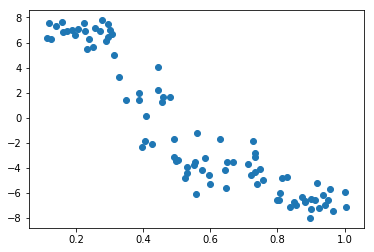

In [129]:
f,ax = plt.subplots()
mask = (trial_info['morphs']==0) | (trial_info['morphs']==1)
ax.scatter(effmorph,loglr_trial)